In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_2023.csv', header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [8]:
df_copy = df.copy()

In [9]:
df_copy.loc[:122,"Region"]=0
df_copy.loc[122:,"Region"]=1

In [10]:
df_copy[df_copy.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [11]:
df_copy = df_copy.dropna().reset_index(drop=True)

In [12]:
df_copy[df_copy.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [13]:
df_copy.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [14]:
df_copy = df_copy.drop(122).reset_index(drop=True)

In [15]:
df_copy.loc[[121]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0


In [16]:
df_copy.dtypes

day             object
month           object
year            object
Temperature     object
RH              object
Ws              object
Rain            object
FFMC            object
DMC             object
DC              object
ISI             object
BUI             object
FWI             object
Classes         object
Region         float64
dtype: object

In [17]:
[feature for feature in df_copy.columns if df_copy[feature].dtype=='O'  ]

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [18]:
df_copy['Classes'] = df_copy['Classes'].str.strip()

In [19]:
df_copy['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

In [20]:
# df_copy['Classes'] = np.where(df_copy['Classes']=='fire',1,0)

In [21]:
[feature for feature in df_copy.columns if df_copy[feature].dtype=='O'  ]

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes']

In [22]:
df_copy[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df_copy[['Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype('float64')

In [23]:
[feature for feature in df_copy.columns if df_copy[feature].dtype=='O'  ]

['day', 'month', 'year', 'Classes']

In [24]:
df_copy[['day', 'month', 'year']] =df_copy[['day', 'month', 'year']].astype('int32')

In [25]:
[feature for feature in df_copy.columns if df_copy[feature].dtype!='O'  ]

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

In [26]:
df_copy[df_copy.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [36]:
percentage = df_copy.Classes.value_counts(normalize=True)*100

In [37]:
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

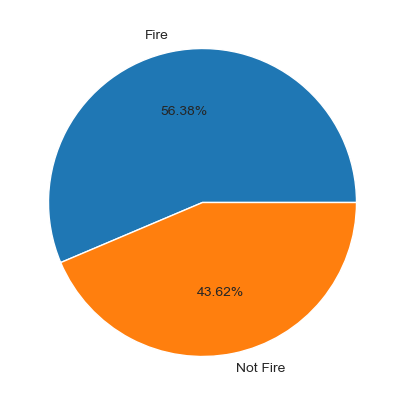

In [38]:
plt.figure(figsize=(8,5))
plt.pie(percentage, labels=['Fire', 'Not Fire'], autopct='%1.2f%%')
plt.show()

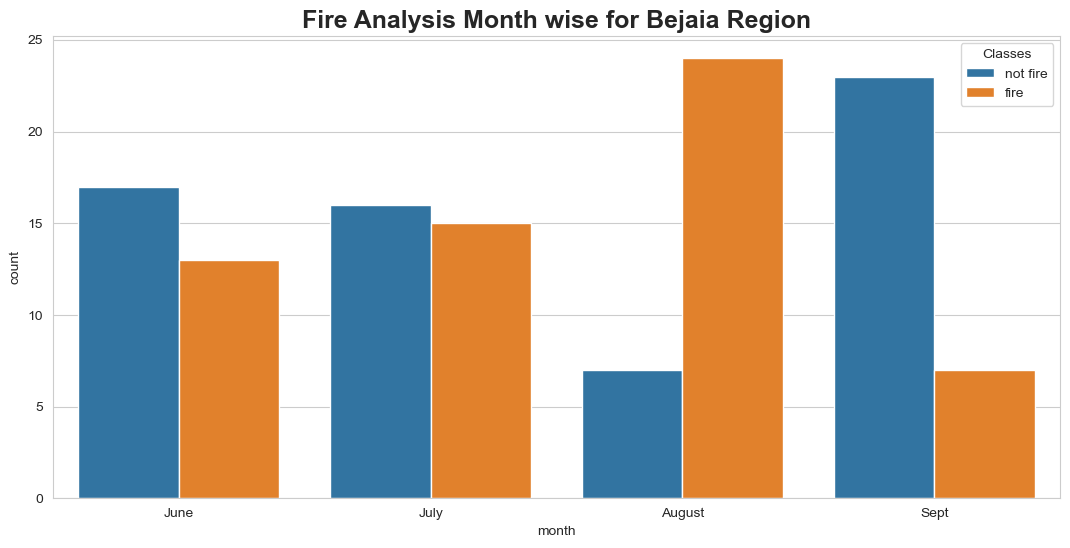

In [39]:
dftemp = df_copy[df_copy['Region']==0]

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot( x='month',data=dftemp, hue='Classes')
plt.xticks(np.arange(4),['June','July','August','Sept'])
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.show()

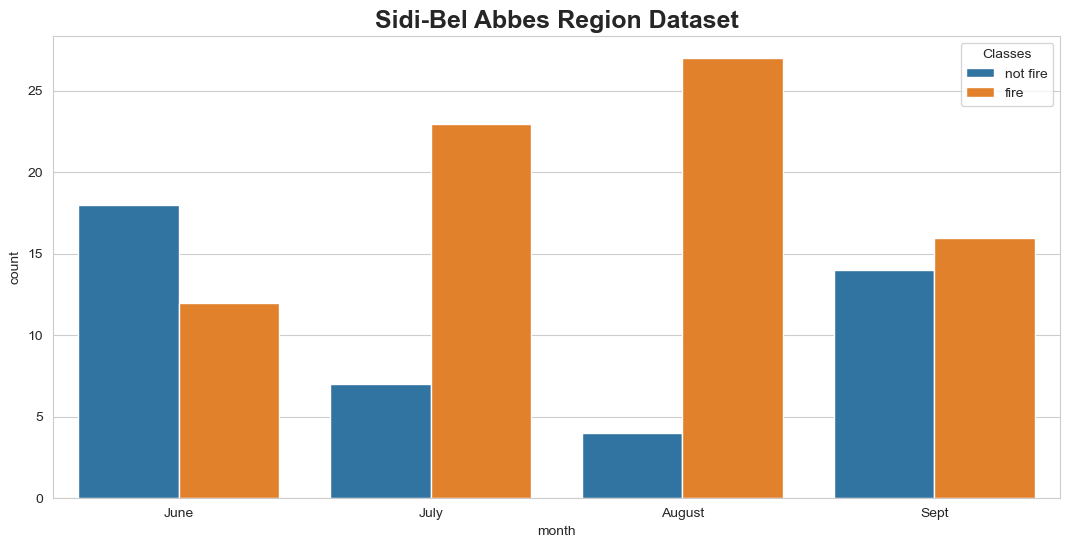

In [40]:
dftemp = df_copy[df_copy['Region']==1]

plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot( x='month',data=dftemp, hue='Classes')
plt.xticks(np.arange(4),['June','July','August','Sept'])
plt.title('Sidi-Bel Abbes Region Dataset', fontsize=18, weight='bold')
plt.show()

In [42]:
df_copy.to_csv('Algerian_EDA_cleaned.csv',index=False)